In [147]:
import pandas as pd
import numpy as np
import scipy

In [164]:
d = 2 # Number of dimensions
k = 12 # Number of classes
n = 10000 # Number of data points
portions = np.array([3, 7, 10, 15, 19, 21, 25, 28, 31, 35, 37, 40]) * 8# Scale for how spread apart the points are
scaling = portions[-1]

## Generate Training Set ("Real" Data)

In [165]:
## Create one linear classifier, and k-1 "barriers" such that,
## if point x lies between barrier i and i-1, the probability it belongs to class i
## is proportional to how close it is to that barrier
def generate_quantile_data(d, k, n):
    ## Vector that classification will be based on
    w = np.array([1/d]*d)

    ## Generate points
    projection_points = np.matrix(np.random.uniform(0, scaling, n)).T
    points_on_line = projection_points * w

    #Ensure noise in range as to not mess with classification too much
    noise = np.reshape(np.matrix(np.random.normal(0, scaling / (16*d), n*d)), (n, d))
    noise = noise - np.dot(noise, w).T * w
    X = points_on_line + noise

    ## Get class labels
    y = get_many_class_labels(projection_points, portions, k)
    
    return X,y

In [166]:
def get_class_labels(projection_points, portions, k):
    y = np.matrix(np.zeros(projection_points.size)).T
    for i in range(0, projection_points.size):
        curr_point = projection_points[i]
        likely_class = np.argmax((curr_point - portions) < 0)
        if(likely_class == k - 1):
            y[i] = k-1
        else:
            if(likely_class > 0):
                prob_up = 1 - (portions[likely_class] - curr_point) / (portions[likely_class] - portions[likely_class - 1])
            else:
                prob_up = 1 - (portions[likely_class] - curr_point) / (portions[likely_class] - 0)
            y[i] = likely_class + 1 * (np.random.uniform(0,1) < prob_up)
    return y

In [167]:
def get_many_class_labels(projection_points, portions, k):
    y = np.matrix(np.zeros(projection_points.size)).T
    for i in range(0, projection_points.size):
        curr_point = projection_points[i]
        probs = 1 / np.power(np.abs(portions - curr_point), 1/2)
        probs = np.asarray(probs / np.sum(probs))
        y[i] = np.random.choice(k, p=probs[0])
    return y

In [168]:
X,y = generate_quantile_data(d, k, n)

In [169]:
np.savetxt('quantile_synthetic_features.csv', X, delimiter=',')
np.savetxt('quantile_synthetic_labels.csv', y, delimiter=',')

In [170]:
X,y = generate_quantile_data(d, k, n)

In [171]:
np.savetxt('quantile_synthetic_testfeatures.csv', X, delimiter=',')
np.savetxt('quantile_synthetic_testlabels.csv', y, delimiter=',')

## Generate Test Data (Computed Quantiles)

In [7]:
## Create one linear classifier, and k-1 "barriers" such that,
## if point x lies between barrier i and i-1, the probability it belongs to class i
## is proportional to how close it is to that barrier
def generate_quantile_testdata(d, k, n):
    ## Vector that classification will be based on
    w = np.array([1/d]*d)

    ## Generate points
    projection_points = np.matrix(np.random.uniform(0, scaling, n)).T
    print(projection_points)
    points_on_line = projection_points * w
    print(points_on_line)

    #Ensure noise in range as to not mess with classification too much
    noise = np.reshape(np.matrix(np.random.normal(0, scaling / (16*d), n*d)), (n, d))
    noise = noise - np.dot(noise, w).T * w
    X = points_on_line + noise
    print(X.dot(w) *d)
    
    return X

In [126]:
def generate_quantile_many_testdata(d, k, n, alpha):
    ## Vector that classification will be based on
    w = np.array([1/d]*d)

    ## Generate points
    projection_points = np.matrix(np.random.uniform(0, scaling, n)).T
    points_on_line = projection_points * w

    #Ensure noise in range as to not mess with classification too much
    noise = np.reshape(np.matrix(np.random.normal(0, scaling / (16*d), n*d)), (n, d))
    noise = noise - np.dot(noise, w).T * w
    X = points_on_line + noise
    
    y = get_many_class_quantiles(projection_points, portions, k, alpha)
    
    return X, y

In [142]:
def get_many_class_quantiles(projection_points, portions, k, alpha):
    y = np.matrix(np.zeros(projection_points.size)).T
    for i in range(0, projection_points.size):
        curr_point = projection_points[i]
        probs = 1 / np.power(np.abs(portions - curr_point), 1/2)
        probs = np.asarray(probs / np.sum(probs))
        y[i] = np.argmax(np.cumsum(probs) > alpha)
    return y

In [145]:
alpha = 0.8
X, y = generate_quantile_many_testdata(d, k, n, alpha)

In [146]:
np.savetxt('quantile_synthetic_manytestfeatures.csv', X, delimiter=',')
np.savetxt('quantile_synthetic_manytestlabels.csv', y, delimiter=',')

## Understand how data looks

In [140]:
from matplotlib import pyplot as plt

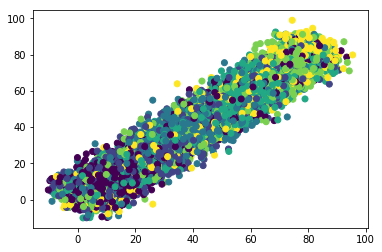

In [141]:
plt.scatter([X[:, 0]], [X[:, 1]], c=[y])